Problem 1

In [95]:
import numpy as np

def mean(X):
    # Input validation
    if not isinstance(X, (list, np.ndarray)) or len(X) == 0 or not isinstance(X[0], (list, np.ndarray)):
        raise ValueError("Input must be a non-empty matrix")
        
    mean = []
    # Get the number of columns
    for i in range(len(X[0])):
        sum = 0
        # loop over rows
        for j in range(len(X)):
            sum += X[j][i]
        mean.append(sum / len(X))
    return mean

def cov(X):
    # Input validation
    if not isinstance(X, (list, np.ndarray)) or len(X) == 0 or not isinstance(X[0], (list, np.ndarray)):
        raise ValueError("Input must be a non-empty matrix")
        
    # Check that all rows have the same length
    for row in X:
        if len(row) != len(X[0]):
            raise ValueError("All rows must have the same length")
    
    # Covariance requires at least two samples
    if len(X) == 1:
        raise ValueError("At least two samples are needed")     
        
    m = mean(X)
    cov = []
    for i in range(len(X[0])):
        # Row for covariance values
        cov_row = []
        # Calculate covariance
        for j in range(len(X[0])):
            cov_ij = 0
            for k in range(len(X)):
                cov_ij += (X[k][i]-m[i])*(X[k][j]-m[j])
            cov_row.append(cov_ij/len(X))
        # Add row to covariance matrix
        cov.append(cov_row)
    return cov

In [212]:
X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(mean(X))
print(cov(X))

[4.0, 5.0, 6.0]
[[6.0, 6.0, 6.0], [6.0, 6.0, 6.0], [6.0, 6.0, 6.0]]


Problem 2

In [73]:
!pip install scikit-learn

In [207]:
from sklearn import datasets
iris = datasets.load_iris()

In [159]:
my_cov = cov(iris.data)
print(my_cov)

[[0.6811222222222222, -0.04215111111111109, 1.2658199999999995, 0.512828888888889], [-0.04215111111111109, 0.1887128888888887, -0.3274586666666668, -0.12082844444444452], [1.2658199999999995, -0.3274586666666668, 3.0955026666666674, 1.2869719999999993], [0.512828888888889, -0.12082844444444452, 1.2869719999999993, 0.5771328888888888]]


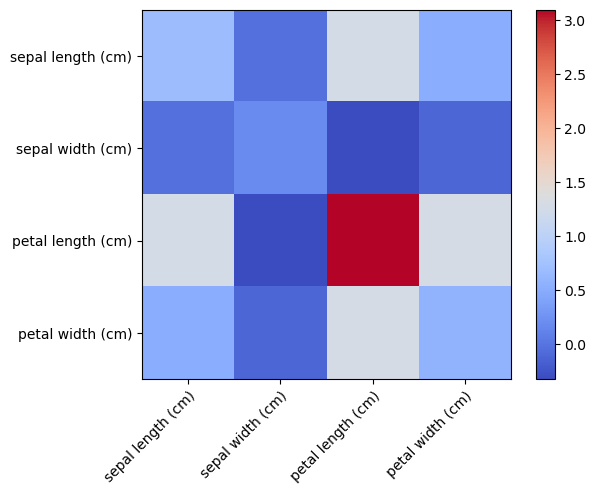

In [205]:
import matplotlib.pyplot as plt
import numpy as np

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(my_cov, cmap = "coolwarm")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(iris.feature_names)), labels=iris.feature_names)
ax.set_yticks(np.arange(len(iris.feature_names)), labels=iris.feature_names)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)

In [155]:
import pandas as pd

iris_df = pd.DataFrame(iris.data)
print(iris_df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [165]:
pd_cov = iris_df.cov(ddof = 0)
print(pd_cov)

          0         1         2         3
0  0.681122 -0.042151  1.265820  0.512829
1 -0.042151  0.188713 -0.327459 -0.120828
2  1.265820 -0.327459  3.095503  1.286972
3  0.512829 -0.120828  1.286972  0.577133


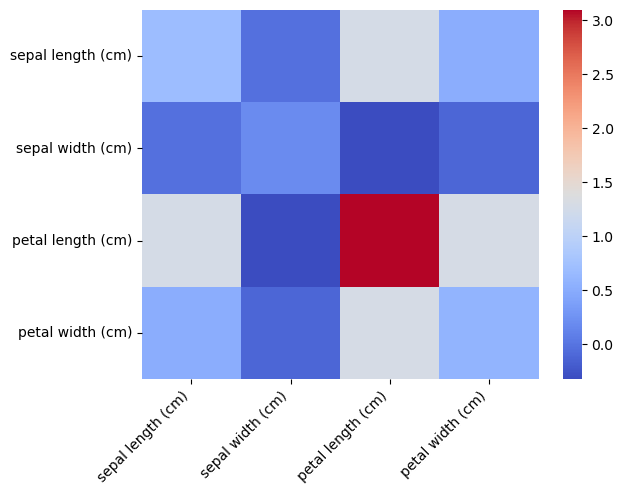

In [193]:
import seaborn as sns

# Create the heatmap
plt.figure()
sns.heatmap(pd_cov, cmap = "coolwarm", xticklabels = iris.feature_names, yticklabels = iris.feature_names)

# Rotate the tick labels and set their alignment
plt.xticks(rotation=45, ha='right')
plt.show()